# Machine Learning Workflow
Complete the steps below to complete the machine learning workflow for this classifier.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

def load_data():
    df = pd.read_csv('../data/corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y

def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

### Step 1: Load data and perform a train test split
Hint: you can use the [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn.

In [7]:
# load data
X, y = load_data()

# perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

### Step 2: Train classifier
* Fit and transform the training data with [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Hint: You can include your tokenize function in the `tokenizer` keyword argument!
* Fit and transform these word counts with [`TfidfTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).
* Fit or train a classifier to these tfidf values. Hint, you can use the [`RandomeForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) or other classifier of your choice.


In [19]:
# Instantiate transformers and classifier
vect = CountVectorizer(tokenizer = tokenize)
tfidf = TfidfTransformer()
clf = RandomForestClassifier()

# Fit and/or transform each to the training data
# Hint: you can use the fit_transform method

X_train_counts = vect.fit_transform(X_train)
X_train_tfidf = tfidf.fit_transform(X_train_counts)

# Fit or train the classifier
clf.fit(X_train_tfidf, y_train)


RandomForestClassifier()

### Step 3: Predict on test data
* Transform (no fitting) the test data with the same `CountVectorizer` and `TfidfTransformer`
* Predict labels on these tfidf values.

In [20]:
# Transform test data
X_test_counts = vect.transform(X_test)
X_test_tfidf = tfidf.transform(X_test_counts)

# Predict test labels
y_pred = clf.predict(X_test_tfidf)

### Step 4: Display results
Use the variable `labels` to store all unique labels in the model's prediction. Then display a confusion matrix and accuracy score based on the model's predictions. 

Hint: you can use the [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) in sklearn to generate a confusion matrix.

Hint: to calculate the accuracy, you can use the number of correct predictions divided by the total number of predictions.

Accuracy:  0.9434276206322796


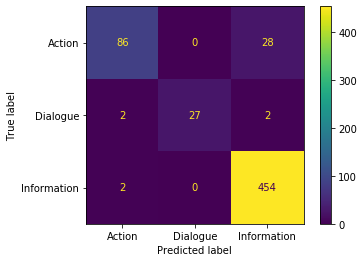

In [61]:
labels = np.unique(y_pred)
plot_confusion_matrix(clf, X_test_tfidf, y_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

# Final Step: Refactor
Organize these steps into the following functions.

In [64]:
def display_results():
    # insert step 4 here
    labels = np.unique(y_pred)
    plot_confusion_matrix(clf, X_test_tfidf, y_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))


def main():
    # insert steps 1 through 3 and the display_results() here
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    
    vect = CountVectorizer(tokenizer = tokenize)
    tfidf = TfidfTransformer()
    clf = RandomForestClassifier()
    
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    
    clf.fit(X_train_tfidf, y_train)
    
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)
    y_pred = clf.predict(X_test_tfidf)
    
    display_results()

Accuracy:  0.9434276206322796


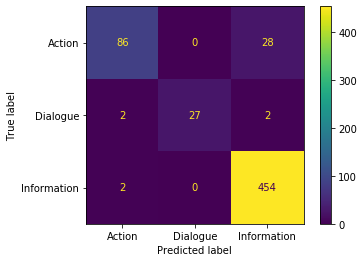

In [65]:
# run program
main()